## Programa simulando el atractor de Lorentz.
Antes de entender que es el atractor de Lorentz, tendremos que entender (más o menos) qué es un sistema complejo (y lo siento, no es un sistema muy complicado en el que te vas a dejar la cabeza... por lo menos por ahora :)). 
Los sistemas complejos son aquellos sistemas formados por múltiples componentes que interactúan entre sí de manera **no lineal**, lo que genera comportamientos **impredecibles** y sensibles a las **condiciones iniciales**. Un ejemplo clásico de sistema complejo es el atractor de Lorentz, que surge al resolver el siguiente sistema de ecuaciones diferenciales no lineales:


\begin{aligned}
    \frac{dx}{dt} &= \sigma (y - x) \\
    \frac{dy}{dt} &= x (\rho - z) - y \\
    \frac{dz}{dt} &= x y - \beta z
\end{aligned}


donde $\sigma$, $\rho$ y $\beta$ son parámetros del sistema. El atractor de Lorentz muestra cómo, a partir de reglas simples, pueden emerger patrones caóticos y estructuras complejas, siendo fundamental en el estudio de la teoría del caos y la dinámica de sistemas no lineales.
En este archivo simplemente vamos a resolver este sistema con el método de Runge Kutta de orden 4 (aunque hay otros métodos (método de Euler o los implicitos en Python) los cuales discutimos en otro archivo **Comparación de métodos**).

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

Implementamos el método de Runge-Kutta orden 4 para resolver el sistema de orden 3 de ecuaciones diferenciales no lineales acopladas.
Definimos el métode de Runge metiendole la matriz del sistema, los valores inicales, el tiempo final de iteraciones y los argumentos adicionales para la función.

In [8]:
def metodo_Rk(f,t0,X0,t_final,h):

    n = round((t_final-t0)/h)
    t=np.linspace(t0,t_final,n+1)
    m = len(X0)
    x = np.zeros((n+1, m))
    x[0] = X0
    for i in range(n):
        k1 = h * f(x[i])
        k2 = h * f(x[i] + k1/2)
        k3 = h * f(x[i] + k2/2)
        k4 = h * f(x[i] + k3)
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / float(6)
    return t, x

#Definimos las ecuaciones de Lorentz: donde $\sigma$, $\rho$ y $\beta$ son parametros que meteremos manualmente. Llamamos X al vector de estado x,y,z 
# y me retorna la derivada de las componentes del vector metiendole los diferentes parámetros.

def sistema_lorentz(x,sigma,beta,rho):
 
    dx_dt=sigma*(x[1]-x[0])
    dy_dt=x[0]*(rho-x[2])-x[1]
    dz_dt=x[0]*x[1]-beta*x[2]
    return np.array([dx_dt,dy_dt,dz_dt])

Empezamos a definir los paramentros que necesitaremos para implementar las funciones.

In [12]:
#Podemos ahora darle valores a los parámetros (tener en cuenta que no todos los valores de los parámetros dan lugar a un atractor de Lorentz, por ejemplo si $\sigma=0$ el sistema se vuelve lineal y no es caótico)
sigma = 30
beta = 8/3
rho = 50
X0 = np.array([0.,-1.,0.])
t0 = 0
t_final = 200
h = 0.001
t, x = metodo_Rk(lambda x: sistema_lorentz(x, sigma, beta, rho), t0, X0, t_final, h)

Llamamos y ploteamos el sistema definido:

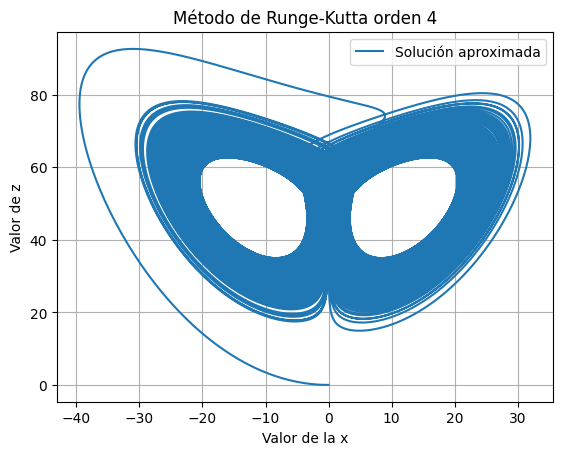

In [13]:
plt.plot(x[:,0],x[:,2], label='Solución aproximada')#Mariposa

plt.xlabel('Valor de la x')
plt.ylabel('Valor de z')
plt.title('Método de Runge-Kutta orden 4')
plt.legend()
plt.grid(True)
plt.show()

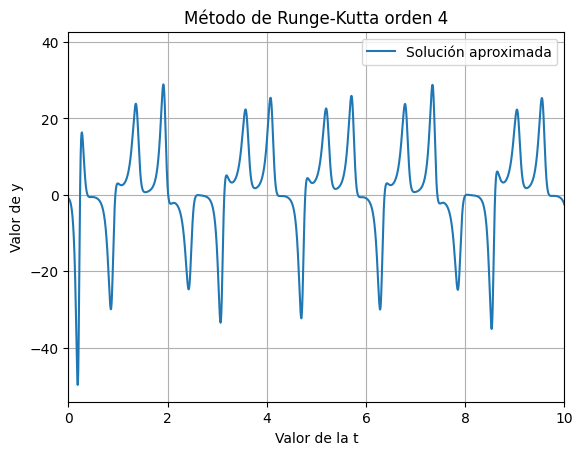

In [ ]:
plt.plot(t,x[:,1] , label='Solución aproximada')
plt.xlabel('Valor de la t')
plt.ylabel('Valor de y')
plt.title('Método de Runge-Kutta orden 4')
plt.xlim(0,10)
plt.legend()
plt.grid(True)
plt.show()

Para una mejor visualización podemos plotear las tres dimensiones y ver la llamada: "Mariposa" o podemos hacer una animación de cómo evoluciana el sistema.

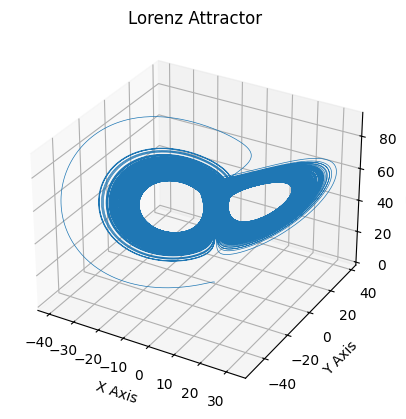

In [15]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*x.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

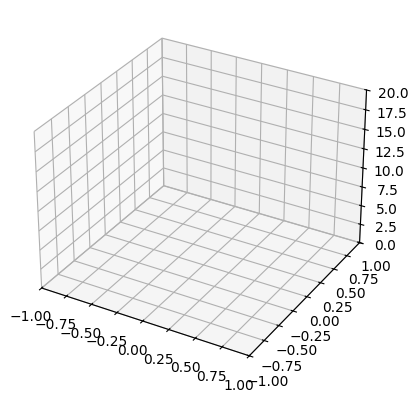

In [ ]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
ax.set_zlim([0, 50])